Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Вспомогательная метрика:
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

Сдача проекта:

1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb).

2. Приложить файл с названием по образцу PNagornyi_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).

Сроки сдачи:
Сдать проект за 72 часа после Урока 10 ("Вебинар. Консультация по итоговому проекту").

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Загрузка данных и просмоттр данных

In [2]:
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')
print(f'Размерность данных:\n'
      f'Train dataset:\t{d_train.shape[0]} наблюдений \t {d_train.shape[1]} признаков\n'
      f'Test dataset:\t{d_test.shape[0]} наблюдений \t {d_test.shape[1]} признаков')

Размерность данных:
Train dataset:	10000 наблюдений 	 20 признаков
Test dataset:	5000 наблюдений 	 19 признаков


In [3]:
d_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
d_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [5]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [7]:
d_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
d_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


#### Чистка данных

In [9]:
d_train=d_train.drop(['Healthcare_1'],axis=1)
d_test=d_test.drop(['Healthcare_1'],axis=1)

In [10]:
d_train.loc[d_train.HouseYear>2050]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [11]:
d_train.loc[d_train.HouseYear==20052011, 'HouseYear'] = 2008
d_train.loc[d_train.HouseYear==4968, 'HouseYear'] = 1968

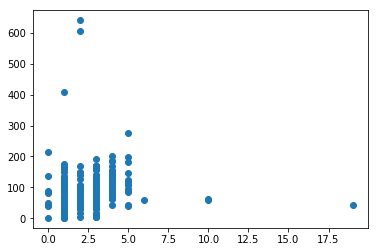

In [12]:
plt.scatter(d_train['Rooms'], d_train['Square']);

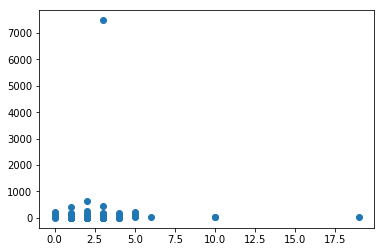

In [13]:
plt.scatter(d_train['Rooms'], d_train['LifeSquare']);

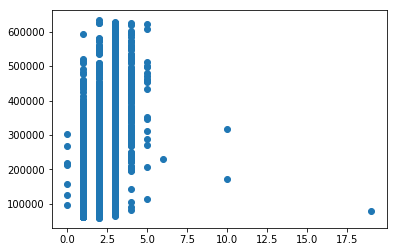

In [14]:
plt.scatter(d_train['Rooms'],d_train['Price']);

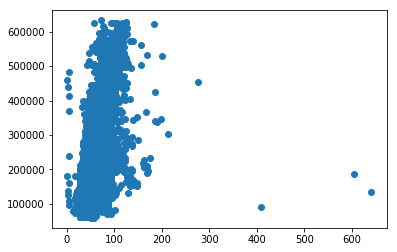

In [15]:
plt.scatter(d_train.Square,d_train['Price']);

выбрасами будем считать наблюдения в которых:

    1)количество комнат больше 5(рассмотреть количество комнат равным 0)
    2)площадь комнат больше 300

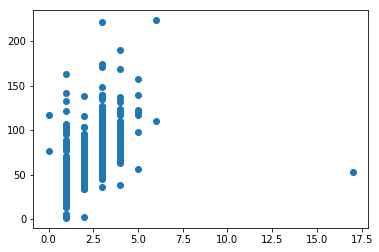

In [16]:
plt.scatter(d_test['Rooms'], d_test['Square']);

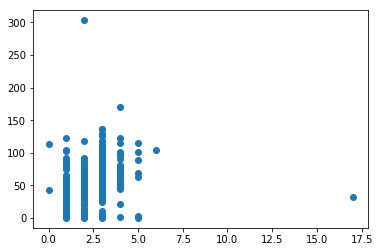

In [17]:
plt.scatter(d_test['Rooms'], d_test['LifeSquare']);

### Functions

In [18]:
def prepare_square(df):
    df.loc[df['Square']>(df['Rooms']*40+40), 'Square']=df['Rooms']*40+40
    df.loc[df['Square']<(df['Rooms']*12), 'Square']=df['Rooms']*12
    df.loc[df['Square'] < df['LifeSquare'],'Square'] = df.loc[df['Square'] < df['LifeSquare'], ('LifeSquare')]
    return df

def prepare_lifesquare(df):
    squ25_75 = df.loc[(df.Square>41.879998)&(df.Square<65.985903)]
    square_lifesquare_25_75 = (squ25_75.Square/squ25_75.LifeSquare).mean()
    df.LifeSquare = df.LifeSquare.fillna(df.Square/square_lifesquare_25_75)
    
    d_train.loc[(d_train['LifeSquare']>(d_train['Rooms']*40+20)), 'LifeSquare']=\
    d_train.loc[(d_train['LifeSquare']>(d_train['Rooms']*40+20)), 'Square']-\
    d_train.loc[(d_train['LifeSquare']>(d_train['Rooms']*40+20)), 'KitchenSquare']
    
    df.loc[df['LifeSquare']<(df['Rooms']*9), 'LifeSquare']=df['Rooms']*15
    return df

def df_fix_square(df):    
    for i in df.loc[df.Square>300]['Square'].unique():
        df.loc[df.Square==i, 'Square']=i/10
    return df

def df_fix_lifesq(df):   
    for i in df.loc[df.LifeSquare>300]['LifeSquare'].unique():
        df.loc[df.LifeSquare==i, 'LifeSquare']=i/10
    return df

def df_fix_kitchsq(df):   
    for i in df.loc[df.KitchenSquare>=35]['KitchenSquare'].unique():
        df.loc[df.KitchenSquare==i, 'KitchenSquare']=i/10
    return df

##### 1)количество комнат больше 5(рассмотреть количество комнат равным 0)

In [19]:
d_train.loc[(d_train.Rooms>5)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [20]:
for i in d_train.loc[d_train.Rooms>5]['DistrictId'].unique():
    print(d_train.loc[d_train.DistrictId==i].groupby(['DistrictId','Rooms','HouseYear'])[['Square', 'LifeSquare']].mean())

                               Square  LifeSquare
DistrictId Rooms HouseYear                       
57         1.0   1952       36.081011   17.438633
                 1960       33.144243   19.227784
                 1962       34.826262   20.507386
                 1964       29.298168   29.770784
                 1969       39.661875   20.892889
                 1972       38.275555   23.960926
                 1974       37.667724   24.098726
                 1975       38.963303   20.915342
                 1977       43.555252         NaN
                 1979       40.945754   22.586388
                 1981       41.365698   22.587433
                 1983       39.383615   23.618599
                 1985       37.339123   23.265119
                 1989       42.361150   20.955140
                 1992       38.485252   22.550608
                 2002       39.430170   22.633556
                 2003       38.704716   22.671800
                 2004       43.301545   19.968339


In [21]:
d_train.loc[1454, 'Rooms']=1
d_train.loc[[377, 2170, 8849], 'Rooms']=2

In [22]:
d_train.loc[(d_train.Rooms>4)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,B,B,17,3079,59,0,8,B,479525.147323
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,B,A,31,7010,5,3,7,B,310305.074733
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
3268,8901,34,5.0,121.577423,114.913843,1.0,25,1.0,1977,0.069753,B,B,53,13670,4,1,11,B,455446.393758
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,0,0,B,112693.641769
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,1,3,B,206148.845716
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
4762,4070,21,5.0,114.313752,88.492650,9.0,6,5.0,1960,0.034331,B,B,25,5487,3,0,4,B,499830.937577
5361,2879,78,5.0,118.871952,69.023509,10.0,15,16.0,1998,0.092291,B,B,21,4346,2,1,2,B,496026.671162
5466,3454,8,5.0,112.135525,79.795451,10.0,4,17.0,1999,0.437885,B,B,23,5735,3,0,5,B,471833.787538


In [23]:
d_train.loc[[3271, 4431], 'Rooms']=1

In [24]:
d_train.loc[(d_train.Rooms==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [25]:
for i in d_train.loc[d_train.Rooms==0]['DistrictId'].unique():
    print(d_train.loc[d_train.DistrictId==i].groupby(['DistrictId','Rooms'])[['Square', 'LifeSquare']].mean())

                      Square  LifeSquare
DistrictId Rooms                        
27         0.0     96.658160  108.361311
           1.0     42.632860   30.051200
           2.0     63.752485   42.922676
           3.0     78.876474  140.261204
           4.0    131.912133  116.659047
                      Square  LifeSquare
DistrictId Rooms                        
28         0.0     49.483501         NaN
           1.0     38.178473   21.404086
           2.0     50.214095   30.644594
           3.0     74.595633   47.167962
           4.0    103.763025   63.407266
                     Square  LifeSquare
DistrictId Rooms                       
6          0.0    81.491446         NaN
           1.0    43.878527   29.472495
           2.0    62.461098   42.781228
           3.0    80.223971   54.852140
                     Square  LifeSquare
DistrictId Rooms                       
88         0.0    38.697117   19.345131
           1.0    40.384491   24.556270
           2.0    48.66293

In [26]:
d_train.loc[[2269,3911,4853,6149], 'Rooms']=1
d_train.loc[[4366,8834], 'Rooms']=3
d_train.loc[[1397], 'Rooms']=4
d_train.loc[[1981], 'Rooms']=5

In [27]:
d_test.loc[d_test.Rooms>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [28]:
for i in d_test.loc[d_test.Rooms>5]['DistrictId'].unique():
    print(d_test.loc[d_test.DistrictId==i].groupby(['DistrictId','Rooms'])[['Square', 'LifeSquare']].mean())

                      Square  LifeSquare
DistrictId Rooms                        
23         1.0     42.194412   33.430630
           2.0     60.439617   48.027233
           3.0     83.028521   60.162809
           4.0     89.169940         NaN
           5.0    139.045763   89.790274
           6.0    110.750226         NaN
                      Square  LifeSquare
DistrictId Rooms                        
27         0.0     76.345154   42.820796
           1.0     44.012827   30.981928
           2.0     63.154496   45.832842
           3.0     80.807911   52.884740
           4.0    111.084664   76.529747
           6.0    223.453689  104.113552
                     Square  LifeSquare
DistrictId Rooms                       
111        1.0    37.712531   23.842077
           2.0    50.489395   31.570527
           3.0    65.726092   45.475342
           4.0    77.900767   55.316306
           17.0   52.866107   32.528342


In [29]:
d_test.loc[[2071, 3217], 'Rooms']=5
d_test.loc[3398, 'Rooms']=2

In [30]:
d_test.loc[d_test.Rooms==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [31]:
for i in d_test.loc[d_test.Rooms==0]['DistrictId'].unique():
    print(d_test.loc[d_test.DistrictId==i].groupby(['DistrictId','Rooms'])[['Square', 'LifeSquare']].mean())

                      Square  LifeSquare
DistrictId Rooms                        
58         0.0    116.824201  113.692424
           1.0     46.410827   24.197063
           2.0     60.017144   36.780348
           3.0     79.859443   51.602665
           4.0     84.807356   56.206766
                      Square  LifeSquare
DistrictId Rooms                        
27         0.0     76.345154   42.820796
           1.0     44.012827   30.981928
           2.0     63.154496   45.832842
           3.0     80.807911   52.884740
           4.0    111.084664   76.529747
           5.0    223.453689  104.113552


In [32]:
d_test.loc[[2406], 'Rooms']=5
d_test.loc[2524, 'Rooms']=3

##### 2)площадь комнат больше 300

проверка тренировочных данных на выбросы

In [33]:
d_train.loc[d_train.Square>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [34]:
d_train.loc[d_train.LifeSquare>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [35]:
for i in d_train.loc[d_train.Square>300]['DistrictId'].unique():
    print(d_train.loc[d_train.DistrictId==i].groupby(['DistrictId','Rooms'])[['Square', 'LifeSquare']].mean())

                      Square  LifeSquare
DistrictId Rooms                        
9          1.0     43.096532   23.442214
           2.0     63.026090   31.775510
           3.0     76.112568   47.735021
           4.0    100.583577   59.070176
                      Square  LifeSquare
DistrictId Rooms                        
102        1.0    226.291341  225.347649
           2.0     46.656552   29.350425
           3.0     69.313091   60.096128
                      Square  LifeSquare
DistrictId Rooms                        
30         1.0     45.126879   38.144665
           2.0     70.031267   72.883285
           3.0     84.181221   63.911883
           4.0    109.311622   77.606892


In [36]:
for i in d_train.loc[d_train.LifeSquare>300]['DistrictId'].unique():
    print( d_train.loc[d_train.DistrictId==i].groupby(['DistrictId','Rooms'])[['Square', 'LifeSquare']].mean())

                      Square  LifeSquare
DistrictId Rooms                        
27         1.0     42.525835   29.939406
           2.0     63.752485   42.922676
           3.0     78.936924  139.655317
           4.0    132.998060  120.570337
           5.0    212.932361  211.231125
                      Square  LifeSquare
DistrictId Rooms                        
102        1.0    226.291341  225.347649
           2.0     46.656552   29.350425
           3.0     69.313091   60.096128
                      Square  LifeSquare
DistrictId Rooms                        
30         1.0     45.126879   38.144665
           2.0     70.031267   72.883285
           3.0     84.181221   63.911883
           4.0    109.311622   77.606892
                     Square  LifeSquare
DistrictId Rooms                       
85         1.0    41.330063   22.990432
           2.0    53.066192   32.207550
           3.0    72.766263   62.100082
           4.0    64.595030   47.175306


In [37]:
d_train=df_fix_square(d_train)   
d_train=df_fix_lifesq(d_train)
d_train=df_fix_lifesq(d_train)

In [38]:
d_train.loc[d_train.Square>250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666


In [39]:
d_train.loc[d_train.LifeSquare>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


##### проверка тестовых данных


In [40]:
d_test.loc[d_test.Square>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [41]:
d_test.loc[d_test.LifeSquare>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,0,0,B


In [42]:
d_test=df_fix_lifesq(d_test)
d_test.loc[410]

Id                  11533
DistrictId             94
Rooms                   2
Square            48.7134
LifeSquare        30.3071
KitchenSquare           6
Floor                   5
HouseFloor             12
HouseYear            1974
Ecology_1        0.521867
Ecology_2               B
Ecology_3               B
Social_1               25
Social_2             6149
Social_3                0
Helthcare_2             0
Shops_1                 0
Shops_2                 B
Name: 410, dtype: object

###### проверка выбросов по разнице между общей и жилой площади

общая площадь меньше чем жилая площадь делённая на 2

In [43]:
d_train.loc[d_train['Square'] < (d_train['LifeSquare']/2)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [44]:
d_train.loc[(d_train.DistrictId==1)&(d_train.Rooms==1)&(d_train.HouseYear==1977),('Square', 'LifeSquare')].mean()

Square        44.089995
LifeSquare    36.681321
dtype: float64

In [45]:
d_train.loc[[6332,590], 'LifeSquare']=d_train.loc[[6332,590], 'LifeSquare']/10
d_train.loc[[212,3280,8030], 'Square']=d_train.loc[[212,3280,8030], 'Square']*10
d_train.loc[6392,('Square')]=d_train.loc[(d_train.DistrictId==1)&(d_train.Rooms==1)&(d_train.HouseYear==1977),('Square')].mean()
d_train.loc[6392,('LifeSquare')]=d_train.loc[(d_train.DistrictId==1)&(d_train.Rooms==1)&(d_train.HouseYear==1977),('LifeSquare')].mean()
d_train.loc[[212,590,3280,6332,6392,8030]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,54.970614,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.449873,26.354202,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
3280,10527,27,1.0,43.807258,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
6332,8961,27,1.0,33.398983,16.415336,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
6392,14786,1,1.0,44.089995,36.681321,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,48.236794,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


##### d_test

In [46]:
d_test.loc[d_test['Square'] < (d_test['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,0,0,B
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,0,1,B
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,3,23,B
102,10749,6,2.0,65.582572,66.675758,1.0,4,2.0,2017,0.243205,B,B,5,1564,0,0,0,B
143,3895,21,1.0,36.514818,37.209976,7.0,10,9.0,1973,0.194489,B,B,47,8004,3,3,5,B
206,16055,62,3.0,108.218901,108.272277,10.0,4,17.0,2017,0.072158,B,B,2,629,1,0,0,A
261,16000,27,2.0,66.929231,68.087510,12.0,4,17.0,2018,0.072158,B,B,2,629,1,0,0,A
272,9887,1,2.0,53.658350,54.975247,10.0,10,17.0,2017,0.007122,B,B,1,264,0,0,1,B


In [47]:
d_test.loc[d_test['LifeSquare']<(d_test['Rooms']*9)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
18,3495,27,3.0,82.652818,5.690155,1.0,4,17.0,2015,0.072158,B,B,2,629,1,0,0,A
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
71,9205,120,2.0,85.911827,4.188395,1.0,5,1.0,2016,0.341072,B,B,27,5664,48,3,11,B
77,7034,45,2.0,59.927502,3.798341,1.0,23,1.0,2017,0.195781,B,B,23,5212,6,3,2,B
78,6553,34,5.0,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,1,11,B
153,1105,9,3.0,105.351051,5.589869,1.0,11,1.0,1977,0.161532,B,B,25,5648,1,2,4,B
237,5857,26,1.0,56.688460,2.132381,1.0,8,20.0,2013,0.000000,B,B,36,6714,2,0,2,B
259,13706,23,3.0,81.003455,2.366869,1.0,5,5.0,2017,0.034656,B,B,0,168,0,0,0,B
263,11407,79,4.0,37.920348,21.357487,6.0,6,17.0,2014,0.307467,B,A,30,5048,9,2,5,B
325,940,27,1.0,48.674779,2.912992,1.0,7,17.0,2016,0.072158,B,B,2,629,1,0,0,A


In [48]:
d_test.loc[d_test['Square']<(d_test['Rooms']*12)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
263,11407,79,4.0,37.920348,21.357487,6.0,6,17.0,2014,0.307467,B,A,30,5048,9,2,5,B
599,8494,21,3.0,35.585010,34.674037,6.0,8,9.0,1975,0.194489,B,B,47,8004,3,3,5,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,0,0,B
3912,6060,53,5.0,56.600162,2.742068,1.0,6,18.0,1977,0.049637,B,B,34,7759,0,1,3,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,0,0,B


In [49]:
d_test=prepare_lifesquare(d_test)
d_test=prepare_square(d_test)
d_test.loc[4713]

Id                    170
DistrictId              6
Rooms                   2
Square            61.4686
LifeSquare        61.4686
KitchenSquare           1
Floor                  18
HouseFloor             17
HouseYear            2014
Ecology_1        0.243205
Ecology_2               B
Ecology_3               B
Social_1                5
Social_2             1564
Social_3                0
Helthcare_2             0
Shops_1                 0
Shops_2                 B
Name: 4713, dtype: object

##### d_train

In [50]:
d_train.loc[d_train['Square'] < (d_train['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,0,0,A,131797.472284
178,2416,57,1.0,29.298168,29.770784,5.0,7,5.0,1964,0.133215,B,B,49,11395,3,3,4,A,148991.265200
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,B,B,6,1437,3,0,2,B,165071.825722
212,1748,88,2.0,54.970614,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
217,5540,27,3.0,57.643613,59.425078,9.0,16,10.0,1977,0.072158,B,B,2,629,1,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,B,B,9,1892,0,0,1,B,182228.520030


корректировка минимальных площадей(за минимум будем брать 12)

In [51]:
d_train.loc[(d_train['Square']<12)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4853,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,3,2,B,438005.182323
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,483283.488083


In [52]:
for i in d_train.loc[(d_train['Square']<12)]['DistrictId'].unique():
    print( d_train.loc[d_train.DistrictId==i].groupby(['DistrictId','Rooms','HouseYear'])[['Square', 'LifeSquare']].mean())

                                Square  LifeSquare
DistrictId Rooms HouseYear                        
27         1.0   1963        33.299527   20.742431
                 1965        33.398983   16.415336
                 1967        32.734414   16.515843
                 1968        29.386944   16.820321
                 1970        34.453567   21.542273
                 1975        39.209834   20.949718
                 1977        42.308989   29.053286
                 1980        36.298564   17.487654
                 1988        33.876189   21.885764
                 1991        38.044787   21.740718
                 1992        38.077685   22.185915
                 1997        38.586180   20.407536
                 1998        39.980432   22.266373
                 1999        39.039506   18.575377
                 2001        43.356618   22.276188
                 2002        38.891881   21.889667
                 2003        44.356179   22.692656
                 2004        44

In [53]:
d_train.loc[(d_train.DistrictId==45)&(d_train.Rooms==1)&(d_train.HouseYear==1977),('Square', 'LifeSquare')]

,Square,LifeSquare
477,63.419553,2.286357
1102,40.357831,42.115983
2040,42.451660,19.611278
2115,42.713308,NaN
2590,38.467276,39.624493
3888,50.214616,50.759533
4587,50.568359,NaN
5175,43.520740,19.573338
6144,42.745306,NaN
8514,41.380223,NaN


In [54]:
d_train.loc[[1316,4853],('Square')]=d_train.loc[(d_train.DistrictId==27)&(d_train.Rooms==1)&
                                                (d_train.HouseYear==1977),('Square')].mean()
d_train.loc[[4900],('Square')]=d_train.loc[(d_train.DistrictId==27)&(d_train.Rooms==3)&
                                           (d_train.HouseYear==2016),('Square')].mean()
d_train.loc[[1608],('Square')]=d_train.loc[(d_train.DistrictId==6)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==2014),('Square')].mean()
d_train.loc[[3413],('Square')]=d_train.loc[(d_train.DistrictId==5)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==1977),('Square')].mean()
d_train.loc[[8283],('Square')]=d_train.loc[(d_train.DistrictId==34)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==1977),('Square')].mean()
d_train.loc[[9294],('Square')]=d_train.loc[(d_train.DistrictId==45)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==1977),('Square')].mean()
d_train.loc[[9613],('Square')]=d_train.loc[[9613],('Square')]*10

In [55]:
d_train.loc[[1316,4853],('LifeSquare')]=d_train.loc[(d_train.DistrictId==27)&(d_train.Rooms==1)&
                                                (d_train.HouseYear==1977),('LifeSquare')].mean()
d_train.loc[[4900],('LifeSquare')]=d_train.loc[(d_train.DistrictId==27)&(d_train.Rooms==3)&
                                           (d_train.HouseYear==2016),('LifeSquare')].mean()
d_train.loc[[1608],('LifeSquare')]=d_train.loc[(d_train.DistrictId==6)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==2014),('LifeSquare')].mean()
d_train.loc[[3413],('LifeSquare')]=d_train.loc[(d_train.DistrictId==5)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==1977),('LifeSquare')].mean()
d_train.loc[[8283],('LifeSquare')]=d_train.loc[(d_train.DistrictId==34)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==1977),('LifeSquare')].mean()
d_train.loc[[9294],('LifeSquare')]=d_train.loc[(d_train.DistrictId==45)&(d_train.Rooms==1)&
                                           (d_train.HouseYear==1977),('LifeSquare')].mean()
d_train.loc[[9613],('LifeSquare')]=d_train.loc[[9613],('LifeSquare')]*10

In [56]:
d_train.loc[(d_train['LifeSquare']<12)&(d_train.Rooms==4),('LifeSquare')]=d_train.loc[(d_train.Square>94)&(d_train.Square<98)][['LifeSquare']].mean()

In [57]:
d_train.loc[(d_train['LifeSquare']<12),'LifeSquare']=d_train.loc[(d_train['LifeSquare']<12),'Square']

In [58]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7884 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


площадь на одну комнату больше 

In [59]:
for i in d_train.DistrictId.unique():
    print(f'DistictID :{i}')
    print(d_train.loc[(d_train.Square>36.7)&(d_train.Square<43.6)&(d_train.Rooms==1)&(d_train.DistrictId==i)][['Square','LifeSquare']].mean())

DistictID :35
Square        42.372294
LifeSquare    22.662954
dtype: float64
DistictID :41
Square        40.110476
LifeSquare    21.486166
dtype: float64
DistictID :53
Square        39.614755
LifeSquare    26.255516
dtype: float64
DistictID :58
Square        40.554809
LifeSquare    24.293898
dtype: float64
DistictID :99
Square        39.379540
LifeSquare    21.678076
dtype: float64
DistictID :59
Square        39.464343
LifeSquare    21.110977
dtype: float64
DistictID :154
Square        40.225170
LifeSquare    20.173613
dtype: float64
DistictID :74
Square        40.926375
LifeSquare    27.778873
dtype: float64
DistictID :1
Square        40.813718
LifeSquare    33.845350
dtype: float64
DistictID :23
Square        40.957148
LifeSquare    31.243105
dtype: float64
DistictID :28
Square        40.405108
LifeSquare    23.139734
dtype: float64
DistictID :31
Square        39.359977
LifeSquare    24.217762
dtype: float64
DistictID :13
Square        40.232805
LifeSquare    21.346173
dtype: float64

Square        38.839137
LifeSquare    21.687892
dtype: float64
DistictID :89
Square        37.225643
LifeSquare    22.387118
dtype: float64
DistictID :24
Square        42.147737
LifeSquare    23.069785
dtype: float64
DistictID :111
Square        40.642765
LifeSquare    20.078107
dtype: float64
DistictID :138
Square        39.763320
LifeSquare    21.197423
dtype: float64
DistictID :64
Square        39.620813
LifeSquare    24.729216
dtype: float64
DistictID :124
Square        38.210607
LifeSquare    20.506902
dtype: float64
DistictID :183
Square        38.039391
LifeSquare    19.501893
dtype: float64
DistictID :55
Square        40.123051
LifeSquare    20.976256
dtype: float64
DistictID :157
Square       NaN
LifeSquare   NaN
dtype: float64
DistictID :151
Square        38.786491
LifeSquare    19.384835
dtype: float64
DistictID :33
Square        42.161574
LifeSquare    21.032162
dtype: float64
DistictID :87
Square        40.238044
LifeSquare    20.576236
dtype: float64
DistictID :126
Square

общая площадь меньше чем жилая площадь 

In [60]:
for i in d_train.loc[d_train['Square'] < d_train['LifeSquare']]['DistrictId'].unique():
    print( d_train.loc[d_train.DistrictId==i].groupby(['DistrictId','Rooms'])[['Square', 'LifeSquare']].mean())

                      Square  LifeSquare
DistrictId Rooms                        
23         1.0     42.673002   35.303927
           2.0     61.052496   51.911172
           3.0     80.681523   66.011106
           4.0    107.944488  112.642841
           5.0    198.930182  123.139863
                      Square  LifeSquare
DistrictId Rooms                        
38         1.0     55.671513   43.761344
           2.0     59.172250   32.978423
           3.0     96.927167   80.218262
           4.0    123.457781   79.430355
                     Square  LifeSquare
DistrictId Rooms                       
1          1.0    43.767066   35.508606
           2.0    63.012206   51.930645
           3.0    82.503494   66.976517
           4.0    99.893009   67.345083
                     Square  LifeSquare
DistrictId Rooms                       
25         1.0    38.528758   28.807807
           2.0    60.820898   43.213279
           3.0    82.210832   58.139051
           4.0    99.091528

                     Square  LifeSquare
DistrictId Rooms                       
31         1.0    41.199853   23.297746
           2.0    60.045734   36.113940
           3.0    72.844801   47.247192
                      Square  LifeSquare
DistrictId Rooms                        
46         1.0     36.486677   22.566616
           2.0     49.897549   32.130589
           3.0     67.873356   45.858581
           4.0    104.183003   66.714939
           5.0    147.709302         NaN
                     Square  LifeSquare
DistrictId Rooms                       
164        1.0    33.456231   19.482798
           2.0    44.331410   37.978587
           3.0    71.874987   44.529118
                      Square  LifeSquare
DistrictId Rooms                        
8          1.0     39.628500   22.144153
           2.0     51.172923   31.272896
           3.0     75.808148   48.159245
           4.0     93.823062   69.883722
           5.0    112.135525   79.795451
                      Squa

In [61]:
d_train.loc[(d_train['Square']<12)|((d_train['Square']/d_train.Rooms)>40+40)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
506,9552,23,1.0,105.432181,105.432181,0.0,3,2.0,1977,0.014073,B,B,2,475,0,0,0,B,218718.046451
610,9275,113,1.0,101.737698,85.737698,16.0,23,24.0,2019,0.050756,B,B,24,5469,1,0,1,B,396825.943131
1641,11055,151,1.0,174.649522,159.649522,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698
1804,11459,79,1.0,98.727990,49.781722,22.0,18,24.0,2019,0.050756,B,B,24,5469,1,0,1,B,351021.797311
1918,13603,63,1.0,127.651237,127.651237,1.0,8,17.0,2016,0.238617,B,B,26,3889,6,3,6,B,594565.299770
1956,15157,54,1.0,106.239622,89.239622,17.0,26,37.0,2009,0.006076,B,B,30,5285,0,6,6,B,274139.065875
2194,11599,23,1.0,121.988052,NaN,1.0,2,2.0,1977,0.014073,B,B,2,475,0,0,0,B,273307.249093
2688,3229,38,1.0,86.988870,85.988870,1.0,8,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,374010.267117
2881,14662,23,1.0,148.179026,NaN,1.0,1,2.0,1977,0.014073,B,B,2,475,0,0,0,B,160902.854650
3060,3911,38,1.0,98.412646,97.412646,1.0,7,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,434949.392799


In [62]:
d_train.loc[d_train['Square']<(d_train['Rooms']*12)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2247,16772,109,3.0,32.795221,36.659413,6.0,2,9.0,1979,0.136330,B,B,30,6141,10,3,6,B,173602.708629
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,3,4,A,77835.185808
6945,12927,62,2.0,17.414181,NaN,1.0,4,20.0,1977,0.072158,B,B,2,629,1,0,0,A,180750.471749
8148,3052,1,3.0,31.113950,19.799743,6.0,6,5.0,1975,0.014581,B,B,3,760,1,0,0,B,114756.610121
8551,13772,96,4.0,44.128947,18.212628,10.0,10,13.0,2005,0.041116,B,B,53,14892,4,1,4,B,201374.604049


##### d_train

In [63]:
d_train.loc[d_train['LifeSquare']<(d_train['Rooms']*9)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1526,16559,75,2.0,60.610730,17.225296,5.0,5,5.0,1964,0.122090,B,B,29,6566,7,4,0,B,118900.634813
3723,203,33,4.0,101.554252,22.630373,9.0,4,5.0,1958,0.051942,B,B,17,4017,7,2,0,B,82342.775873
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,3,4,A,77835.185808
5667,4352,104,2.0,28.517666,15.565872,3.0,7,6.0,1931,0.000078,B,B,22,6398,141,3,23,B,197245.267664
8148,3052,1,3.0,31.113950,19.799743,6.0,6,5.0,1975,0.014581,B,B,3,760,1,0,0,B,114756.610121
8551,13772,96,4.0,44.128947,18.212628,10.0,10,13.0,2005,0.041116,B,B,53,14892,4,1,4,B,201374.604049
9001,5913,90,3.0,44.418467,21.107737,8.0,10,15.0,1973,0.265089,B,B,37,5288,0,3,2,B,214431.006851


In [64]:
d_train=prepare_lifesquare(d_train)
d_train=prepare_square(d_train)

In [65]:
d_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.887800,56.271827,37.792959,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.811219,18.931689,16.783869,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,16.117154,12.125029,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.883697,25.682393,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.621648,34.061032,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.985903,45.710953,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,249.645284,249.645284,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [66]:
d_train.loc[d_train.Square>239]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,249.645284,249.645284,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666


In [67]:
d_train.loc[d_train.Square>239,'LifeSquare']=d_train.loc[d_train.Square>239,'Square']-(d_train.loc[d_train.Square>239,'KitchenSquare']+20)

In [68]:
d_train.loc[(d_train['KitchenSquare']>=35)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,1,9,B,370148.625285
551,1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,B,B,5,1564,0,0,0,B,146950.912410
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
1077,9690,27,1.0,40.081042,37.834964,37.0,18,19.0,2019,0.211401,B,B,9,1892,0,0,1,B,93218.650461
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2,469,0,0,0,B,189244.249909
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,6,6,B,438708.707579
1860,4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14,3369,24,0,3,B,261125.669724
1867,3267,58,3.0,138.980817,138.004600,43.0,2,2.0,1977,0.437885,B,B,23,5735,3,0,5,B,169528.896664
2916,12390,72,3.0,99.323558,99.323558,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,3,0,B,445074.956552
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,0,0,A,315245.521059


In [69]:
d_train=df_fix_kitchsq(d_train)
d_train.loc[(d_train['KitchenSquare']>=35)]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,201.4,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,197.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


In [70]:
d_train['KitchenSquare'].mean()

5.74527

In [71]:
d_train.loc[[1064,8584],'KitchenSquare']=d_train['KitchenSquare'].mean()
d_train.loc[[1064,8584]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,5.74527,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,5.74527,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


##### d_test

In [72]:
d_test.loc[(d_test['KitchenSquare']>=35)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
40,5428,27,2.0,62.326044,31.162059,61.0,12,17.0,1977,0.072158,B,B,2,629,1,0,0,A
803,3747,23,5.0,139.045763,89.790274,42.0,1,3.0,2015,0.014073,B,B,2,475,0,0,0,B
870,13736,27,1.0,91.704806,91.704806,42.0,3,3.0,2013,0.014073,B,B,2,475,0,0,0,B
1447,1968,27,2.0,120.000000,92.484098,42.0,3,3.0,2016,0.014073,B,B,2,475,0,0,0,B
1456,5260,73,3.0,69.358242,51.247581,65.0,6,6.0,1931,0.042032,B,B,37,6856,84,2,5,B
1777,3341,62,3.0,112.247841,112.247841,112.0,3,3.0,2017,0.072158,B,B,2,629,1,0,0,A
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
3723,4483,62,1.0,45.672140,45.672140,41.0,13,17.0,2018,0.072158,B,B,2,629,1,0,0,A
3816,12612,27,2.0,60.988496,33.646726,60.0,5,17.0,2013,0.072158,B,B,2,629,1,0,0,A
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,0,0,B


In [73]:
d_test=df_fix_kitchsq(d_test)
d_test.loc[(d_test['KitchenSquare']>=35)]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [74]:
d_test.loc[[1964,40,803,3723]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,6.2,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
40,5428,27,2.0,62.326044,31.162059,6.1,12,17.0,1977,0.072158,B,B,2,629,1,0,0,A
803,3747,23,5.0,139.045763,89.790274,4.2,1,3.0,2015,0.014073,B,B,2,475,0,0,0,B
3723,4483,62,1.0,45.672140,45.672140,4.1,13,17.0,2018,0.072158,B,B,2,629,1,0,0,A


In [75]:
d_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908200,56.483422,35.442675,5.716340,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.809632,18.767225,15.652034,3.878319,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,13.305531,9.495367,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.995664,23.186643,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.933734,32.265009,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.416189,43.123814,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,5.000000,223.453689,169.901701,34.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [76]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(6), int64(9), object(3)
memory usage: 703.2+ KB


##### синтетические признаки

In [77]:
stats_square=d_train.groupby(['DistrictId','Rooms','HouseYear'], as_index=False)[['Square']].mean().rename(columns={'Square':'mean_square'})
stats_price=d_train.groupby(['DistrictId','Rooms','HouseYear'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})
stats_lifesquare=d_train.groupby(['DistrictId','Rooms','HouseYear'], as_index=False)[['LifeSquare']].mean().rename(columns={'LifeSquare':'mean_lifesquare'})


In [78]:
def join_stats_price(df,stats_price,df_source,mode='train'):
    df=df.merge(stats_price,on=['DistrictId','Rooms','HouseYear'],how='left')
    if mode=='test':
        df['mean_price']=df['mean_price'].fillna(df_source['mean_price'].mean())
    return df

def join_stats_square(df,stats_square,df_source,mode='train'):
    df=df.merge(stats_square,on=['DistrictId','Rooms','HouseYear'],how='left')
    if mode=='test':
        df['mean_square']=df['mean_square'].fillna(df_source['mean_square'].mean())
    return df

def join_stats_lifesquare(df,stats_lifesquare,df_source,mode='train'):
    df=df.merge(stats_lifesquare,on=['DistrictId','Rooms','HouseYear'],how='left')
    if mode=='test':
        df['mean_lifesquare']=df['mean_lifesquare'].fillna(df_source['mean_lifesquare'].mean())
    return df

In [79]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [80]:
d_train=join_stats_price(d_train,stats_price,d_train)
d_train=join_stats_square(d_train,stats_square,d_train)
d_train=join_stats_lifesquare(d_train,stats_lifesquare,d_train)

In [81]:
d_train['Ecology_2'][d_train['Ecology_2']=='A']=0
d_train['Ecology_2'][d_train['Ecology_2']=='B']=1
d_train['Ecology_3'][d_train['Ecology_3']=='A']=0
d_train['Ecology_3'][d_train['Ecology_3']=='B']=1
d_train['Shops_2'][d_train['Shops_2']=='A']=0
d_train['Shops_2'][d_train['Shops_2']=='B']=1

In [82]:
d_train['Ecology_2']=d_train['Ecology_2'].astype('category')
d_train['Ecology_3']=d_train['Ecology_3'].astype('category')
d_train['Shops_2']=d_train['Shops_2'].astype('category')

In [83]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Id                 10000 non-null int64
DistrictId         10000 non-null int64
Rooms              10000 non-null float64
Square             10000 non-null float64
LifeSquare         10000 non-null float64
KitchenSquare      10000 non-null float64
Floor              10000 non-null int64
HouseFloor         10000 non-null float64
HouseYear          10000 non-null int64
Ecology_1          10000 non-null float64
Ecology_2          10000 non-null category
Ecology_3          10000 non-null category
Social_1           10000 non-null int64
Social_2           10000 non-null int64
Social_3           10000 non-null int64
Helthcare_2        10000 non-null int64
Shops_1            10000 non-null int64
Shops_2            10000 non-null category
Price              10000 non-null float64
mean_price         10000 non-null float64
mean_square        10000 non-null float64
mean_lifesquare    10000 

#### d_test

In [84]:
d_test=join_stats_price(d_test,stats_price,d_train,mode='test')
d_test=join_stats_square(d_test,stats_square,d_train,mode='test')
d_test =join_stats_lifesquare(d_test,stats_lifesquare,d_train,mode='test')

In [85]:
d_test['Ecology_2'][d_test['Ecology_2']=='A']=0
d_test['Ecology_2'][d_test['Ecology_2']=='B']=1
d_test['Ecology_3'][d_test['Ecology_3']=='A']=0
d_test['Ecology_3'][d_test['Ecology_3']=='B']=1
d_test['Shops_2'][d_test['Shops_2']=='A']=0
d_test['Shops_2'][d_test['Shops_2']=='B']=1

In [86]:
d_test['Ecology_2']=d_test['Ecology_2'].astype('category')
d_test['Ecology_3']=d_test['Ecology_3'].astype('category')
d_test['Shops_2']=d_test['Shops_2'].astype('category')

In [87]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id                 5000 non-null int64
DistrictId         5000 non-null int64
Rooms              5000 non-null float64
Square             5000 non-null float64
LifeSquare         5000 non-null float64
KitchenSquare      5000 non-null float64
Floor              5000 non-null int64
HouseFloor         5000 non-null float64
HouseYear          5000 non-null int64
Ecology_1          5000 non-null float64
Ecology_2          5000 non-null category
Ecology_3          5000 non-null category
Social_1           5000 non-null int64
Social_2           5000 non-null int64
Social_3           5000 non-null int64
Helthcare_2        5000 non-null int64
Shops_1            5000 non-null int64
Shops_2            5000 non-null category
mean_price         5000 non-null float64
mean_square        5000 non-null float64
mean_lifesquare    5000 non-null float64
dtypes: category(3), float64(9), int64(9)
memor

### d_train построение моделей

In [88]:
features=d_train[['Rooms','Square','LifeSquare','mean_price','mean_square','mean_lifesquare']] 
target=d_train['Price']

In [89]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression as LR,Ridge
from sklearn.ensemble import RandomForestRegressor as RF

In [91]:
model0=LR()
model1=Ridge()
model2=RF()

In [92]:
%%time
model0.fit(X_train,y_train)

CPU times: user 1.46 ms, sys: 4.11 ms, total: 5.57 ms
Wall time: 4.28 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
%%time
model1.fit(X_train,y_train)

CPU times: user 9.77 ms, sys: 70 µs, total: 9.84 ms
Wall time: 5.26 ms


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
%%time
model2.fit(X_train,y_train)

CPU times: user 533 ms, sys: 3.99 ms, total: 537 ms
Wall time: 371 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
y_pred0=model0.predict(X_test)
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

In [96]:
from sklearn.metrics import mean_squared_error as MSE,r2_score as r2

In [97]:
print("линейная регрессия\n",MSE(y_test,y_pred0),r2(y_test,y_pred0))

линейная регрессия
 601026491.9303062 0.9301274574899945


In [98]:
print("Ridge регрессия\n",MSE(y_test,y_pred1),r2(y_test,y_pred1))

Ridge регрессия
 601026026.9674201 0.9301275115444154


In [99]:
print("Случайный лес \n",MSE(y_test,y_pred2),r2(y_test,y_pred2))

Случайный лес 
 874482800.848622 0.8983366998011639


### d_test построение моделей

In [100]:
feature_test=d_test[['Rooms','Square','LifeSquare','mean_price','mean_square','mean_lifesquare']]

In [101]:
d_test['Price']=model1.predict(feature_test) 

In [102]:
d_test['Price']

0       201933.161065
1       231407.923784
2       135397.087662
3       221446.307946
4       126152.769525
5       210838.997965
6       149189.062154
7       230795.399312
8       306558.416665
9       219397.059003
10      267125.922854
11      227396.297357
12      135258.089190
13      207035.879421
14      111827.452944
15      189282.279231
16      260755.131070
17      185832.511470
18      213892.146075
19      243650.660785
20      181159.307439
21      153132.858022
22      215710.971587
23      173139.920115
24      177894.082649
25      191130.560231
26      283061.461067
27      115931.175106
28      183023.103449
29      305819.979687
            ...      
4970    195155.965674
4971    144244.668688
4972    118377.348628
4973    114524.066977
4974    126951.147371
4975    498401.103736
4976    368971.103900
4977    168549.775292
4978    185492.351998
4979    177139.412283
4980    218058.601487
4981    197960.608970
4982     95113.339026
4983    135257.678750
4984    17

In [103]:
d_test[['Id','Price']].to_csv('OGlukharev_prediction.csv',index=None)

In [104]:
d_test[['Id','Price']]

,Id,Price
0,725,201933.161065
1,15856,231407.923784
2,5480,135397.087662
3,15664,221446.307946
4,14275,126152.769525
5,7633,210838.997965
6,13329,149189.062154
7,5502,230795.399312
8,4220,306558.416665
9,11538,219397.059003
